<h1>Степанов Вячеслав Анатольевич </h1>

<h3>БСВ23-01 </h3>

In [223]:
import numpy as np
import matplotlib.pyplot as plt

In [224]:
def function_show(x, y, min_x, min_y, method_name):
    fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
    ax.scatter(min_x, min_y, color="blue", marker='X', s=100, zorder=1, label="Корень")
    ax.plot(x, y, lw=2, color='red', zorder=0, label="Функция")
    
    # Линия y=0
    ax.axhline(0, color='green', lw=2, linestyle='--', zorder=0, label="y = 0")  
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.set_title("Метод: " + method_name)
    ax.grid()
    ax.legend()
    ax.set_axisbelow(True)
    ax.annotate(f'({min_x:.3f}, {min_y:.3f})', xy=(min_x, min_y), xytext=(min_x, min_y + 0.1),
                textcoords='offset points', ha='center', color='blue', weight='bold')
    plt.show()

# Методы минимизации 

## Метод равномерного поиска

In [225]:
# Метод равномерного поиска
def uniform_search(x_min,x_max,function,epsilon=0.01):
    # Вычесление кол-ва точек
    num_points = int((x_max - x_min)/epsilon)+1

    # Генерация точек
    x = np.linspace(x_min,x_max, num_points)
    y = np.empty(num_points)
    for i in range(num_points):
        y[i] = function(x[i])

    # Поиск минимального значения функции и соответствующей точки
    min_index = np.argmin(y)
    x_min = x[min_index]
    y_min = y[min_index]
    function_show(x,y,x_min,y_min,"равномерного поиска")

## Метод деления интервала пополам

In [226]:
# Метод деления интервала пополам
def div_int_in_half(x_min, x_max, function, epsilon=0.01):
    a,b = x_min,x_max
    if function(x_max) * function(x_min) > 0:
        print("Метод деления интервала пополам не работает для данной функции")
        return None

    half = (x_min + x_max) / 2

    while np.abs(x_max - x_min) >= epsilon:
        if function(half) == 0:
            break  # Выход из цикла, если найден точный корень

        if function(x_min) * function(half) > 0:
            x_min = half
        else:
            x_max = half

        half = (x_min + x_max) / 2

    x = np.linspace(a, b, 400)
    y = function(x)

    function_show(x, y, half, function(half), "деления интервала пополам")
    return 



## Метод дихотомии

In [227]:
#  Метод дихотомии
def dichotomy_search(min_x, max_x, function, epsilon=0.01):
    a,b = min_x,max_x
    delta = epsilon / 2
    while (max_x - min_x) / 2 > epsilon:
        mid = (min_x + max_x) / 2
        left_border = mid - delta
        right_border = mid + delta
        
        if function(left_border) < function(right_border):
            max_x = right_border
        else:
            min_x = left_border
    min_x = (min_x + max_x) / 2
    min_y = function(min_x)
    x = np.linspace(a, b, 400)
    y = function(x)
    function_show(x, y, min_x, min_y, "Метод дихотомии")


## Метод золотого сечения

In [228]:
# Метод золотого сечения
def golden_section_search(x_min, x_max, function, epsilon=0.01):
    a,b = x_min,x_max
    phi = (1 + np.sqrt(5)) / 2 

    x1 = x_max - (x_max - x_min) / phi
    x2 = x_min + (x_max - x_min) / phi
    y_1 = function(x1)
    y_2 = function(x2)
    
    while (x_max - x_min) > epsilon:
        if y_1 < y_2:
            x_max = x2
            x2 = x1
            y_2 = y_1
            x1 = x_max - (x_max - x_min) / phi
            y_1 = function(x1)
        else:
            x_min = x1
            x1 = x2
            y_1 = y_2
            x2 = x_min + (x_max - x_min) / phi
            y_2 = function(x2)
    
    min_x = (x_min + x_max) / 2
    min_y = function(min_x)

    x = np.linspace(a, b, 400)
    y = function(x)

    function_show(x, y, min_x, min_y, "Метод золотого сечения")
    return


# Задачи минимизации

## $$ y = x^2 - 3x + \ln{x}, x \in [1, 2]$$

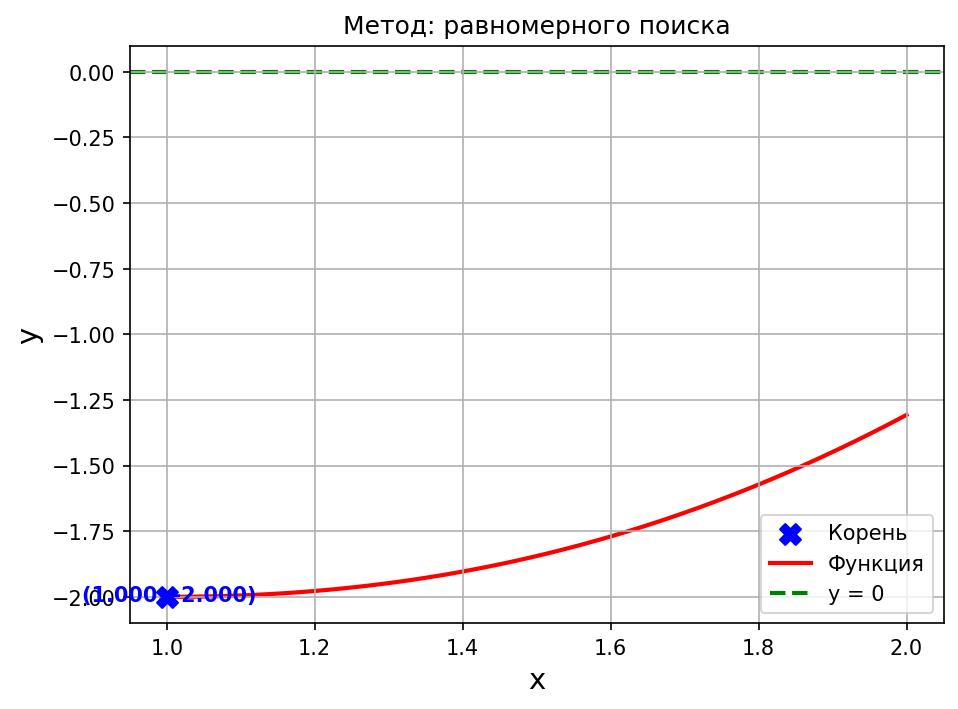

Метод деления интервала пополам не работает для данной функции


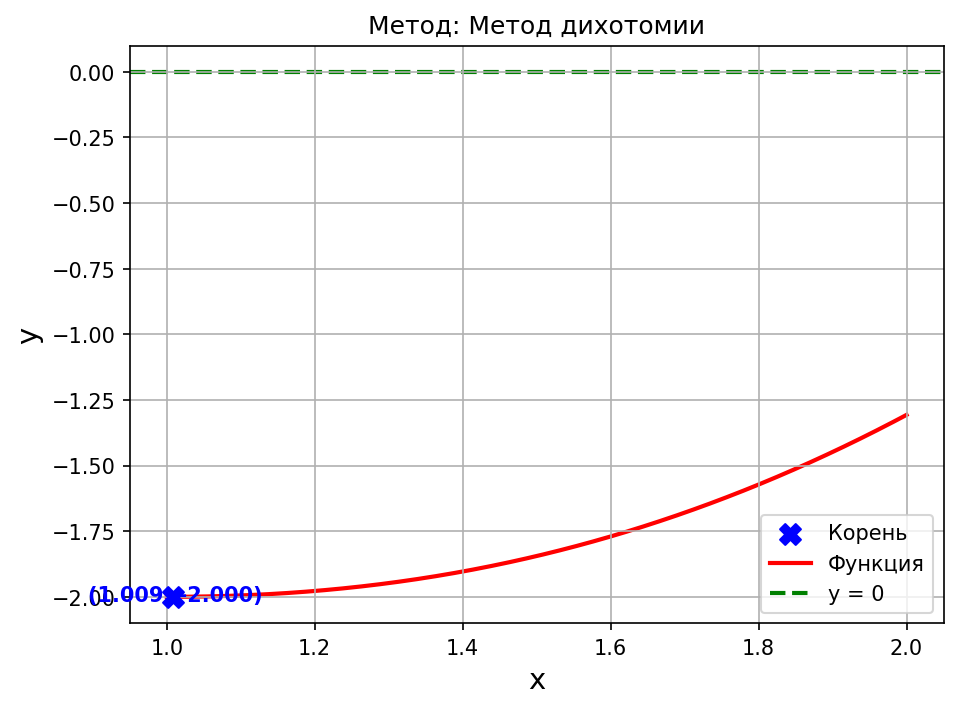

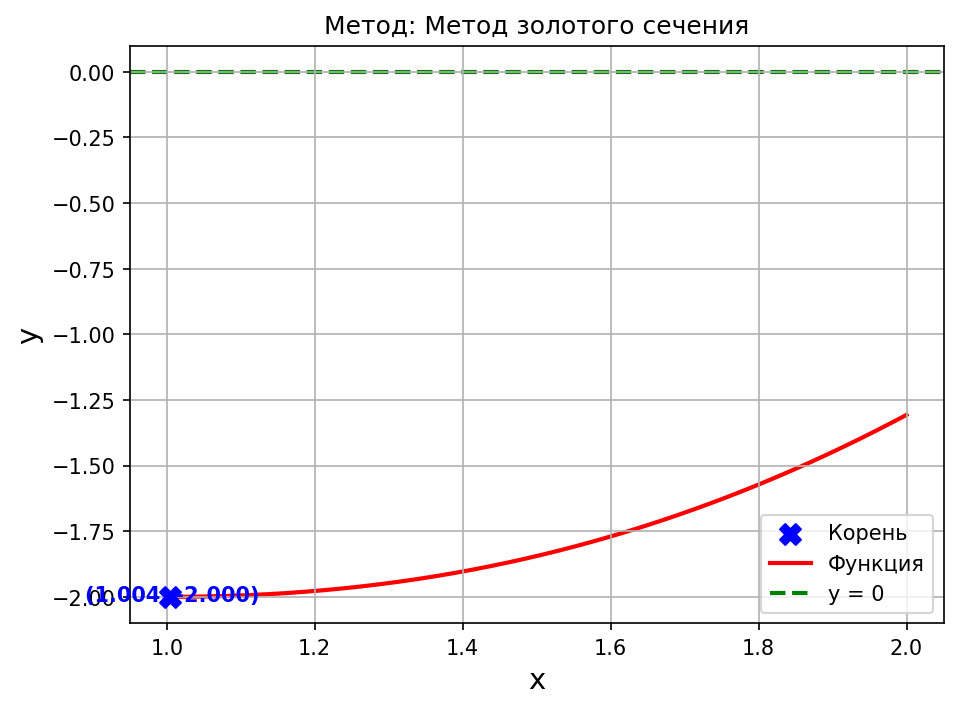

In [229]:
def f(x):
    return x**2 - 3 * x + np.log(x)
min_x = 1
max_x = 2
uniform_search(min_x,max_x,f)
div_int_in_half(min_x,max_x,f)
dichotomy_search(min_x,max_x,f)
golden_section_search(min_x,max_x,f)

## $$ y = 0.25x^4 + x^2 -8x + 12, x \in [0, 2]$$

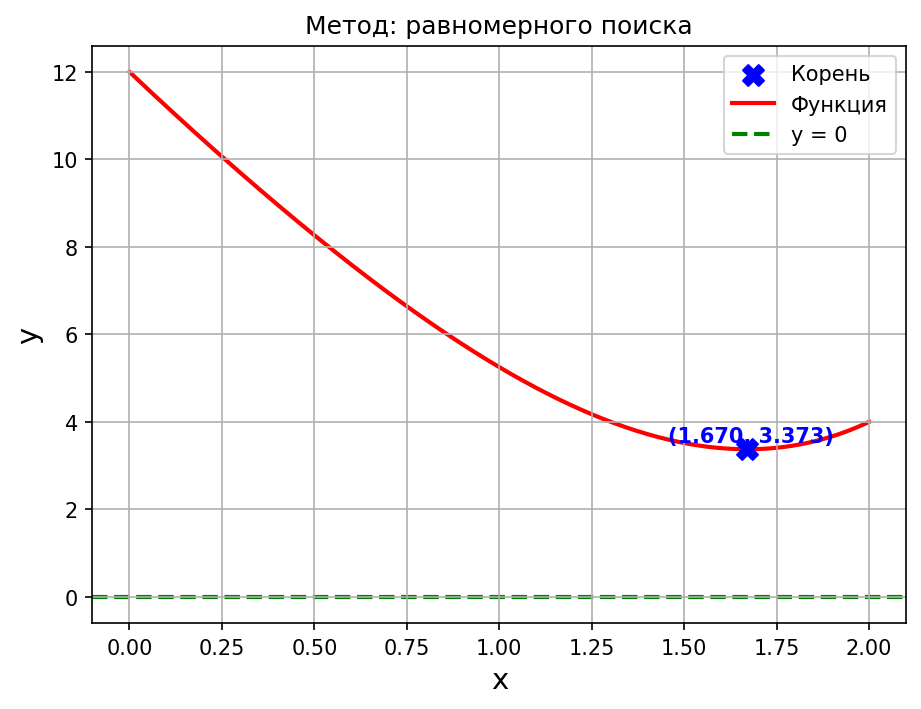

Метод деления интервала пополам не работает для данной функции


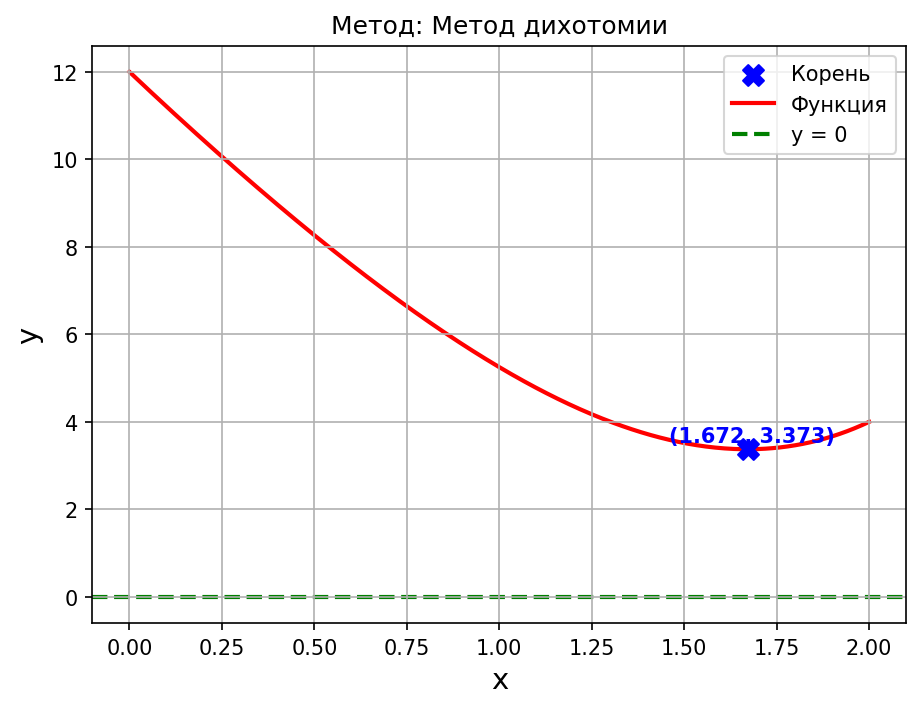

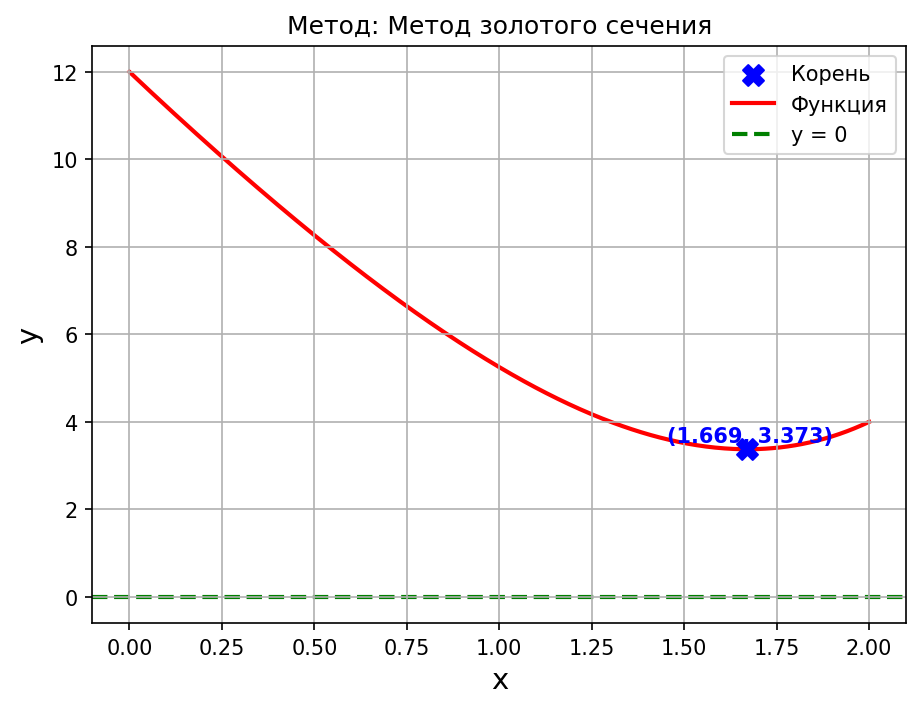

In [230]:
def f(x):
    return 0.25*x**4 + x**2 - 8*x + 12
min_x = 0
min_y = 2
uniform_search(min_x,min_y,f)
div_int_in_half(min_x,max_x,f)
dichotomy_search(min_x,max_x,f)
golden_section_search(min_x,max_x,f)

## $$ y = x^6 - 2.08x^5 + 0.4875x^4 +7.1x^3 -3.95x^2 - x + 0.1, x \in [-2, 2]$$

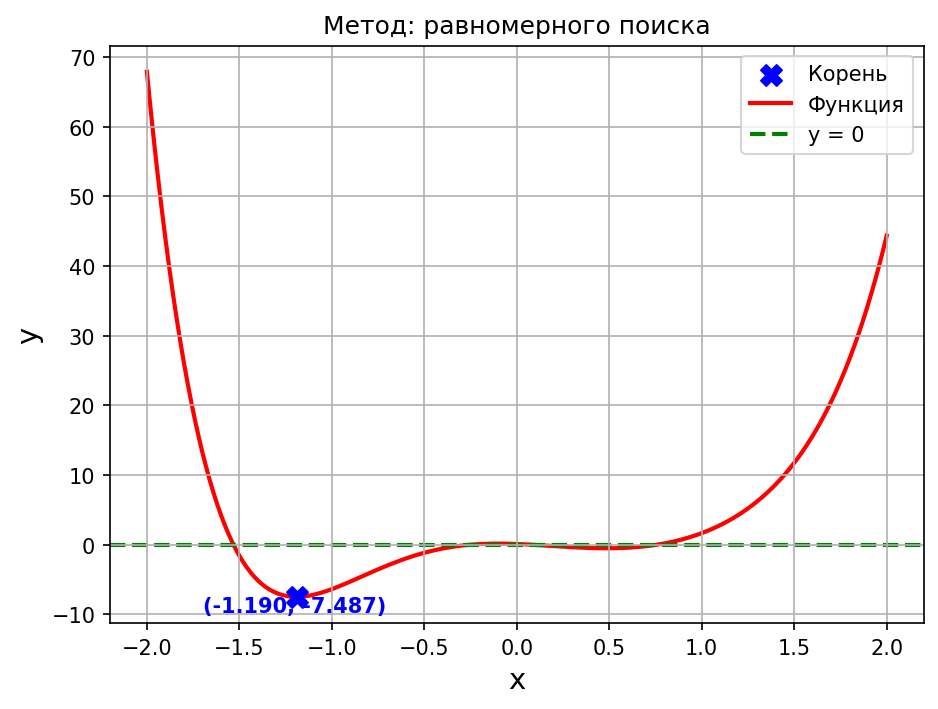

Метод деления интервала пополам не работает для данной функции


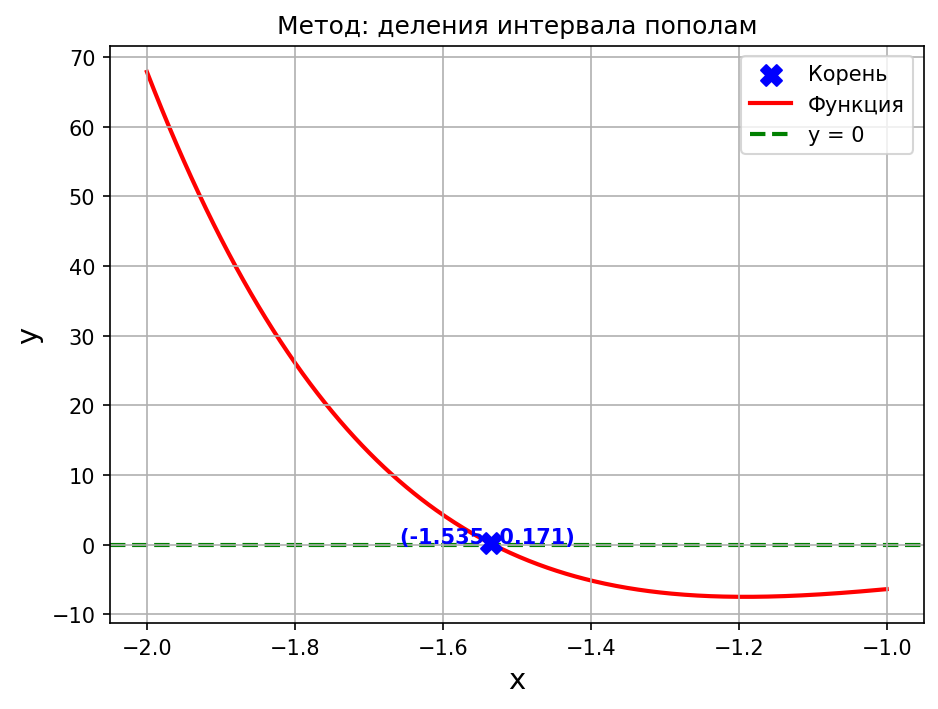

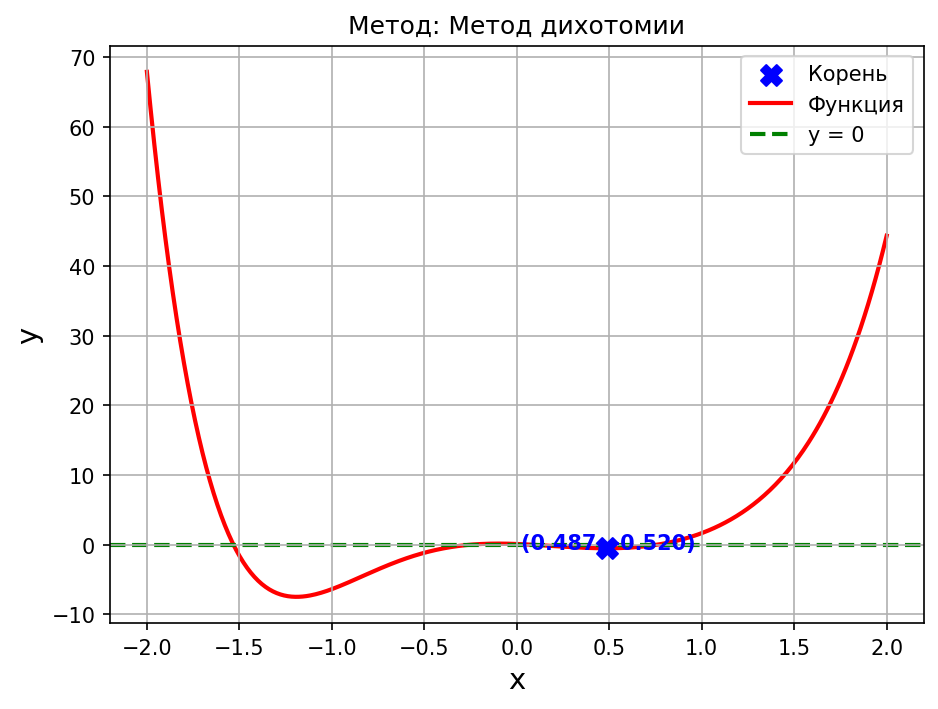

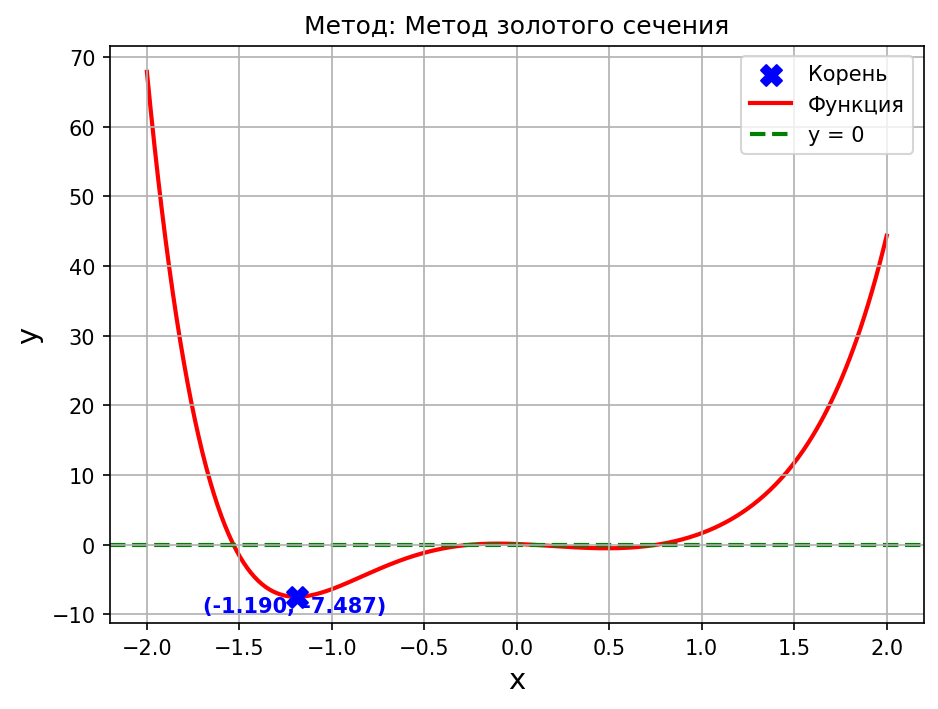

In [231]:
def f(x):
    return x**6 - 2.08 * x**5 + 0.4875 * x**4 + 7.1 * x**3 - 3.95 * x**2 - x +0.1
min_x = -2
min_y = 2
uniform_search(min_x,min_y,f)
div_int_in_half(min_x,max_x,f)

# Но метод деления интервала пополам работает, если изменить интервал 
div_int_in_half(min_x,-1,f)
dichotomy_search(min_x,max_x,f)
golden_section_search(min_x,max_x,f)

## $$ y = 2 - \sin{6x} - \sin{4x}, x \in [0, 2.8]$$

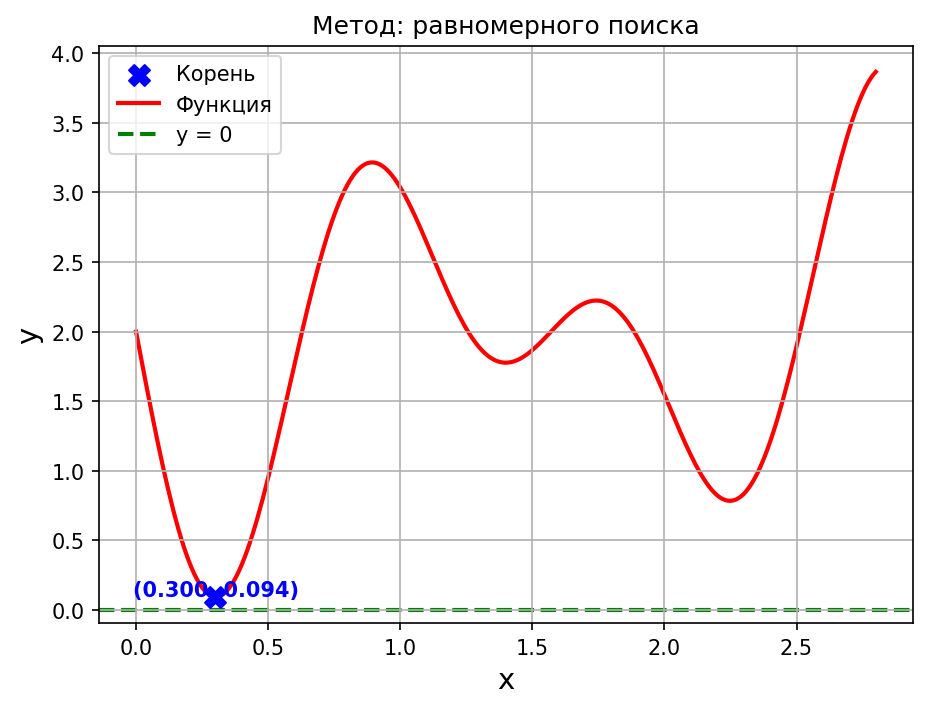

Метод деления интервала пополам не работает для данной функции


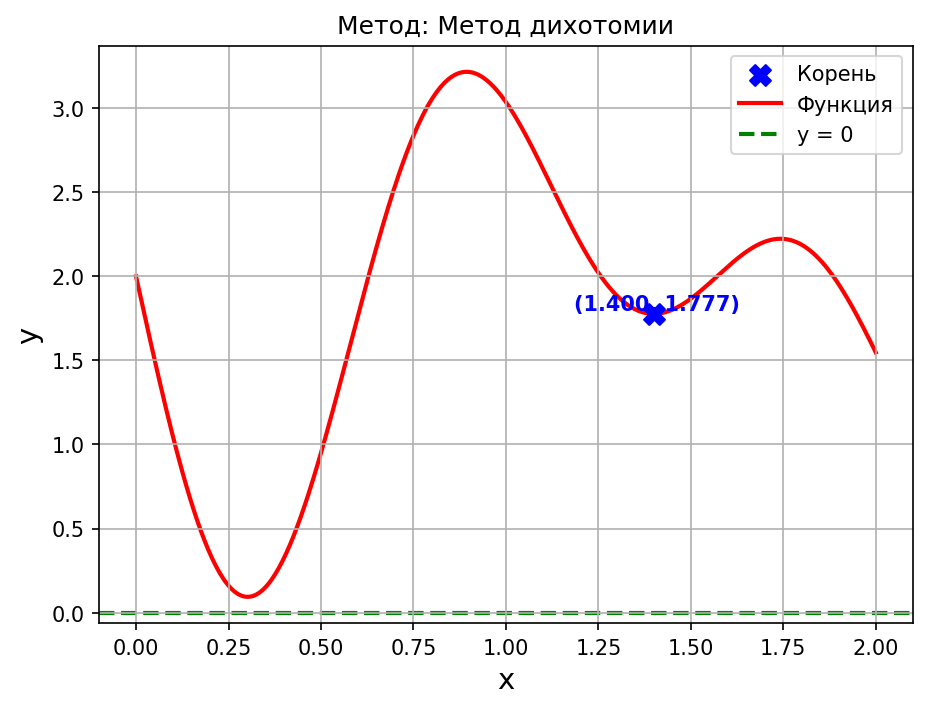

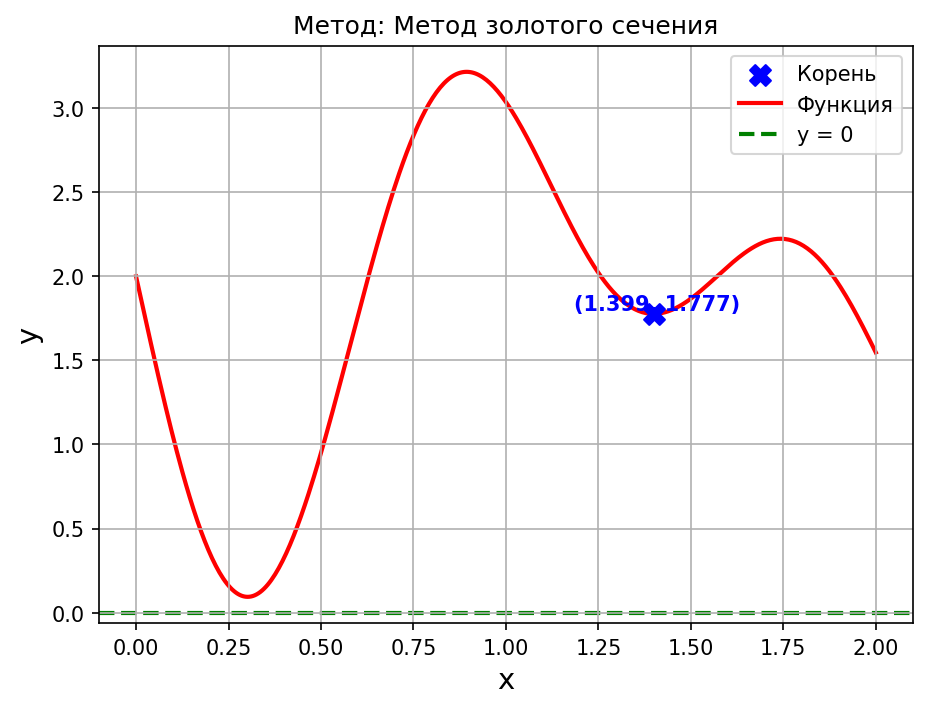

In [232]:
def f(x):
    return 2 - np.sin(6 * x) - np.sin(4 * x)
min_x = 0
min_y = 2.8
uniform_search(min_x,min_y,f)
div_int_in_half(min_x,max_x,f)
dichotomy_search(min_x,max_x,f)
golden_section_search(min_x,max_x,f)